<a href="https://colab.research.google.com/github/ark150/ProyectoTI2Final/blob/master/Analisis_de_datos_TI%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#analisis de datos de A Corp

In [0]:
dtipos = {'Review': str,"Por Usuario": str}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


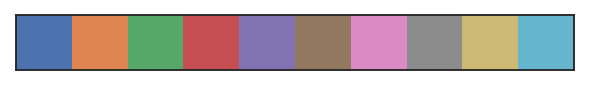

In [1]:
import pandas as pd
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.probability import FreqDist
fdist = FreqDist()
from nltk.corpus import stopwords
nltk.download('stopwords')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()
sns.set(style="white", context="talk")
sns.palplot(sns.color_palette())
plt.rcParams["figure.figsize"]=[19.0,9.0]

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/ark150/ProyectoTI2Final/master/comentarios2-0.csv")

In [3]:
df.shape

(30000, 13)

In [4]:
df["Words Review"]= ""
df["len Review"]= ""
#df["Words Fre"]
df['Review'] = df['Review'].astype('str')
df['Words Review'] = df['Words Review'].astype('str')
#df['Por usuario'] = df['Por usuario'].astype('str')
df['Por'] = df['Por'].astype('str')
df['Por'] = df['Por'].replace(r'\n',' ', regex=True)
df['Por'] = df['Por'].map(lambda x: ' '.join(x.split()))
df.head()

,﻿﻿Link,ID,Producto,Por,Cantidades de comentarios,Precio,Precio recomendado,Nombre alternativo,Por usuario,Fecha de review,Titulo review,Review,Utilidad para personas,Words Review,len Review
0,https://www.amazon.com.mx/dp/B0746LZK1R,B0746LZK1R,2017 Newest Business Flagship Dell Inspiron 15...,Dell,29.0,19090.0,27984,"$19,090.00,Envío en 3 a 4 días.,$19,090.00",5.0,2017-08-25,Turned out to be better than I thought,"Turned out to be better than I thought, very f...",17.0,,
1,https://www.amazon.com.mx/dp/B0746LZK1R,B0746LZK1R,2017 Newest Business Flagship Dell Inspiron 15...,Dell,29.0,19090.0,27984,"$19,090.00,Envío en 3 a 4 días.,$19,090.00",5.0,2017-10-29,Work MachineWith a Dull Screen,A good machine with most of the bells and whis...,12.0,,
2,https://www.amazon.com.mx/dp/B0746LZK1R,B0746LZK1R,2017 Newest Business Flagship Dell Inspiron 15...,Dell,29.0,19090.0,27984,"$19,090.00,Envío en 3 a 4 días.,$19,090.00",4.0,2018-06-01,It sucked. Dell replaced it with a better mode...,I bought this laptop and it had an issue. I th...,0.0,,
3,https://www.amazon.com.mx/dp/B0746LZK1R,B0746LZK1R,2017 Newest Business Flagship Dell Inspiron 15...,Dell,29.0,19090.0,27984,"$19,090.00,Envío en 3 a 4 días.,$19,090.00",5.0,2018-07-16,"Quick boot up, Great price",This laptop has been nothing but outstanding. ...,0.0,,
4,https://www.amazon.com.mx/dp/B0746LZK1R,B0746LZK1R,2017 Newest Business Flagship Dell Inspiron 15...,Dell,29.0,19090.0,27984,"$19,090.00,Envío en 3 a 4 días.,$19,090.00",2.0,2018-02-12,I got a lemon,I have had this laptop 6 weeks and about week ...,0.0,,


In [0]:
df.shape

(10000, 15)

In [0]:
post_punctuation=[]
for word in fdist:
  word=punctuation.sub("",word)
  if len(word)>0:
    post_punctuation.append(word)
post_punctuation

In [0]:
punctuation = re.compile(r'[-.?!,:;()|0-9]')
for i in range(0,len(df)):
  e=df.iloc[i,:]
  t=e["Review"]
  r=word_tokenize(t)
  post_punctuation=[]
  for word in r:
    word=punctuation.sub("",word.lower())
    if len(word)>0:
      post_punctuation.append(word)
  df.at[i,"Words Review"]=post_punctuation
  df.iloc[i,14]=len(post_punctuation)

In [0]:
df.head()

,Column,Link,Producto,Por,Cantidades de comentarios,Precio,Precio recomendado,Nombre alternativo,Por usuario,Fecha de review,Titulo review,Review,Utilidad para personas,Words Review,len Review
0,0,https://www.amazon.com.mx/dp/B01CJJWE2G,"HP Pavilion 2016 Laptop PC 15 Premium, 15.6"", ...",HP,134.0,18499.0,NaN,"$18,499.00,Envío en 3 a 4 días.,$18,499.00",5.0,2016-09-06,Awesome price awesome tech.,Fast not filled with cpu bogging bloat ware si...,1.0,"[fast, not, filled, with, cpu, bogging, bloat,...",16
1,1,https://www.amazon.com.mx/dp/B01CJJWE2G,"HP Pavilion 2016 Laptop PC 15 Premium, 15.6"", ...",HP,134.0,18499.0,NaN,"$18,499.00,Envío en 3 a 4 días.,$18,499.00",3.0,2016-05-10,Three Stars,"No touch volume on keyboard , display looks o...",2.0,"[no, touch, volume, on, keyboard, display, loo...",8
2,2,https://www.amazon.com.mx/dp/B01CJJWE2G,"HP Pavilion 2016 Laptop PC 15 Premium, 15.6"", ...",HP,134.0,18499.0,NaN,"$18,499.00,Envío en 3 a 4 días.,$18,499.00",5.0,2016-06-13,Recommended,Lightweight and useful,1.0,"[lightweight, and, useful]",3
3,3,https://www.amazon.com.mx/dp/B01CJJWE2G,"HP Pavilion 2016 Laptop PC 15 Premium, 15.6"", ...",HP,134.0,18499.0,NaN,"$18,499.00,Envío en 3 a 4 días.,$18,499.00",5.0,2016-09-21,Five Stars,Working Wonderfully,NaN,"[working, wonderfully]",2
4,4,https://www.amazon.com.mx/dp/B01CJJWE2G,"HP Pavilion 2016 Laptop PC 15 Premium, 15.6"", ...",HP,134.0,18499.0,NaN,"$18,499.00,Envío en 3 a 4 días.,$18,499.00",5.0,2016-07-20,Great for the price!,It came exactly as it was described. Great lap...,1.0,"[it, came, exactly, as, it, was, described, gr...",9


In [0]:
fdist = FreqDist()

In [0]:
mejorProducto = df[ (df["Por usuario"] == 1.0) | (df["Por usuario"] == 5.0) ]

In [0]:
len(mejorProducto)

6247

In [0]:
peoresComentarios=[]
for i in range(0,len(mejorProducto)):
  r=mejorProducto.iloc[i,13]
  peoresComentarios=peoresComentarios+r
peoresComentarios

In [0]:
mejoresComentarios =[word for word in peoresComentarios if word.lower() not in stopwords.words('english')]
mejoresComentarios

In [0]:
from nltk.util import bigrams, trigrams, ngrams

In [0]:
frase2w = list(nltk.ngrams(mejoresComentarios,5))
frase2w

In [0]:
len(frase2w)

In [0]:
fdist = FreqDist()
for word in frase2w:
  fdist[word]+=1
fdist

In [0]:
len(peoresComentarios)

In [0]:
fdist = FreqDist()
for word in mejoresComentarios:
  fdist[word.lower()]+=1
fdist

In [0]:
df.tail()

In [0]:
fdistTop10 = fdist.most_common(50)
fdistTop10
#r=word_tokenize(t)
#r


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stopwords.words('english')


In [6]:
stars = df.groupby('len Review').mean()
stars.corr()

,Cantidades de comentarios,Precio,Por usuario,Utilidad para personas
Cantidades de comentarios,1.000000,-0.150728,0.168087,0.213532
Precio,-0.150728,1.000000,-0.002901,0.057492
Por usuario,0.168087,-0.002901,1.000000,0.237711
Utilidad para personas,0.213532,0.057492,0.237711,1.000000


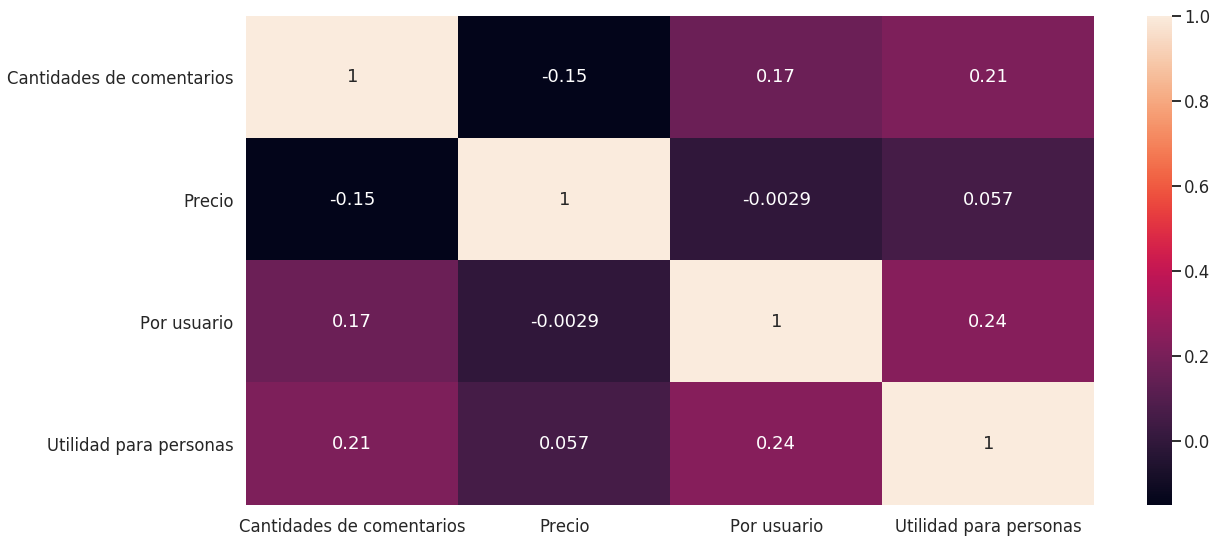

In [7]:
sns.heatmap(data=stars.corr(), annot=True)

se saco el numero el promedio de la comentarios mas utiles, de este promedio se seleccionaron los comentarios que tuvieron una utilidad maor al promedio y se analizo sus resultados

In [8]:
df["Utilidad para personas"].value_counts().sort_index().mean()

128.07692307692307

In [9]:
mejorUtil = df[ df["Utilidad para personas"]>128.0 ]
mejorUtil

,﻿﻿Link,ID,Producto,Por,Cantidades de comentarios,Precio,Precio recomendado,Nombre alternativo,Por usuario,Fecha de review,Titulo review,Review,Utilidad para personas,Words Review,len Review
897,https://www.amazon.com.mx/dp/B012IBOCRU,B012IBOCRU,"Acer Aspire Full HD computadora Notebook, Core...",Acer,349.0,NaN,NaN,Disponible a través de estos vendedores.,5.0,2015-10-03,"Best Bang for the Buck, if you can spend 2-3 h...","Best Bang for the buck.As everybody else said,...",147.0,"[best, bang, for, the, buckas, everybody, else...",120
1036,https://www.amazon.com.mx/dp/B00N99FXIS,B00N99FXIS,Toshiba Chromebook CB35-B3340 Plata 33.8 cm (1...,Toshiba,NaN,NaN,NaN,Disponible a través de estos vendedores.,5.0,2014-09-27,"If You Don't Need Lightning In A Bottle, This ...",UPDATE 10-8-2015: It has been a year since I ...,1054.0,"[update, it, has, been, a, year, since, i, pur...",5184
1037,https://www.amazon.com.mx/dp/B00N99FXIS,B00N99FXIS,Toshiba Chromebook CB35-B3340 Plata 33.8 cm (1...,Toshiba,NaN,NaN,NaN,Disponible a través de estos vendedores.,5.0,2014-10-06,The Best Value Currently On The Market,The Toshiba Chromebook 2 offers a fantastic ex...,265.0,"[the, toshiba, chromebook, offers, a, fantasti...",458
1038,https://www.amazon.com.mx/dp/B00N99FXIS,B00N99FXIS,Toshiba Chromebook CB35-B3340 Plata 33.8 cm (1...,Toshiba,NaN,NaN,NaN,Disponible a través de estos vendedores.,1.0,2015-04-12,Toshiba Chromebook 2 Product Defect,"Like many other reviewers here I, too, had dis...",199.0,"[like, many, other, reviewers, here, i, too, h...",160
1042,https://www.amazon.com.mx/dp/B00N99FXIS,B00N99FXIS,Toshiba Chromebook CB35-B3340 Plata 33.8 cm (1...,Toshiba,NaN,NaN,NaN,Disponible a través de estos vendedores.,5.0,2014-09-26,Toshiba knocked it out of the park on their se...,**Summary: A touch slower than the first gen m...,292.0,"[**summary, a, touch, slower, than, the, first...",688
2515,https://www.amazon.com.mx/dp/B00N99FXIS,B00N99FXIS,Toshiba Chromebook CB35-B3340 Plata 33.8 cm (1...,Toshiba,NaN,NaN,NaN,Disponible a través de estos vendedores.,2.0,2014-10-31,Performance Concern - Unusable for a simple task,I did a lot of research about Chromebooks befo...,218.0,"[i, did, a, lot, of, research, about, chromebo...",560
4598,https://www.amazon.com.mx/dp/B012IBOCRU,B012IBOCRU,"Acer Aspire Full HD computadora Notebook, Core...",Acer,349.0,NaN,NaN,Disponible a través de estos vendedores.,5.0,2015-10-03,"Best Bang for the Buck, if you can spend 2-3 h...","Best Bang for the buck.As everybody else said,...",147.0,"[best, bang, for, the, buckas, everybody, else...",120
4737,https://www.amazon.com.mx/dp/B00N99FXIS,B00N99FXIS,Toshiba Chromebook CB35-B3340 Plata 33.8 cm (1...,Toshiba,NaN,NaN,NaN,Disponible a través de estos vendedores.,5.0,2014-09-27,"If You Don't Need Lightning In A Bottle, This ...",UPDATE 10-8-2015: It has been a year since I ...,1054.0,"[update, it, has, been, a, year, since, i, pur...",5184
4738,https://www.amazon.com.mx/dp/B00N99FXIS,B00N99FXIS,Toshiba Chromebook CB35-B3340 Plata 33.8 cm (1...,Toshiba,NaN,NaN,NaN,Disponible a través de estos vendedores.,5.0,2014-10-06,The Best Value Currently On The Market,The Toshiba Chromebook 2 offers a fantastic ex...,265.0,"[the, toshiba, chromebook, offers, a, fantasti...",458
4739,https://www.amazon.com.mx/dp/B00N99FXIS,B00N99FXIS,Toshiba Chromebook CB35-B3340 Plata 33.8 cm (1...,Toshiba,NaN,NaN,NaN,Disponible a través de estos vendedores.,1.0,2015-04-12,Toshiba Chromebook 2 Product Defect,"Like many other reviewers here I, too, had dis...",199.0,"[like, many, other, reviewers, here, i, too, h...",160


In [10]:
mejorUtil.shape

(102, 15)

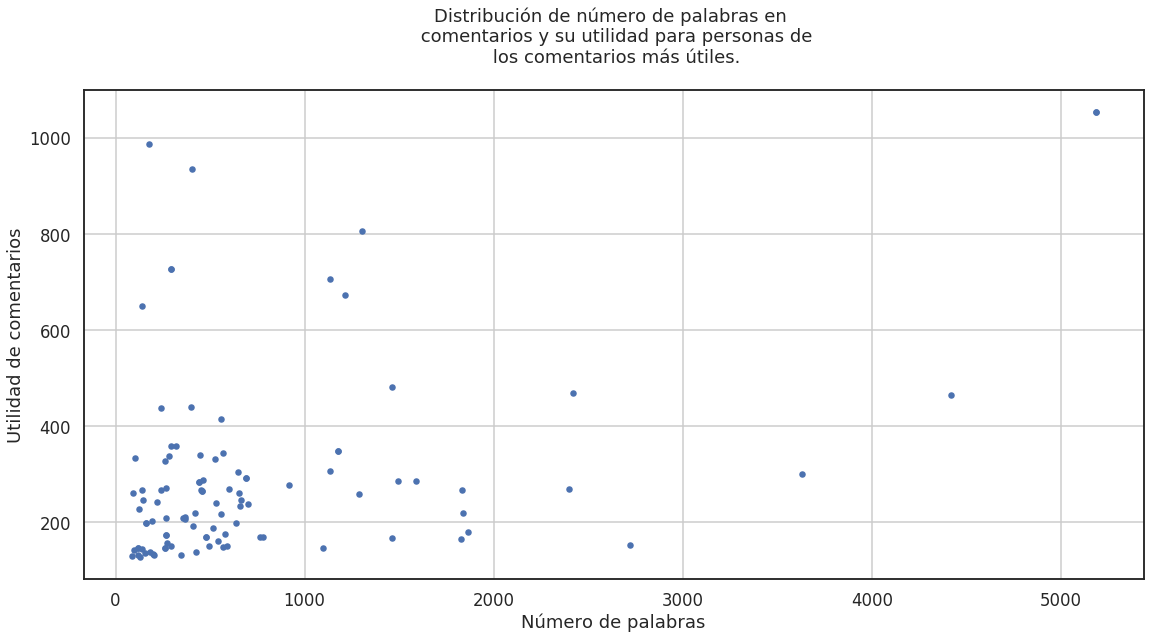

In [37]:
npalabras=mejorUtil["len Review"]
utilidad=mejorUtil["Utilidad para personas"]
plt.scatter(npalabras, utilidad, s=25)
#plt.xlim(0, 1000)
#plt.ylim(0, 200)
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Número de palabras")
plt.ylabel("Utilidad de comentarios")
plt.title("Distribución de número de palabras en \n comentarios y su utilidad para personas de\n los comentarios más útiles.\n")
plt.grid(True)

plt.show()

In [0]:
df["Por usuario"].value_counts().sort_index()

1.0    1921
2.0     749
3.0     780
4.0    1551
5.0    4132
Name: Por usuario, dtype: int64

distribuciones de los datos en general

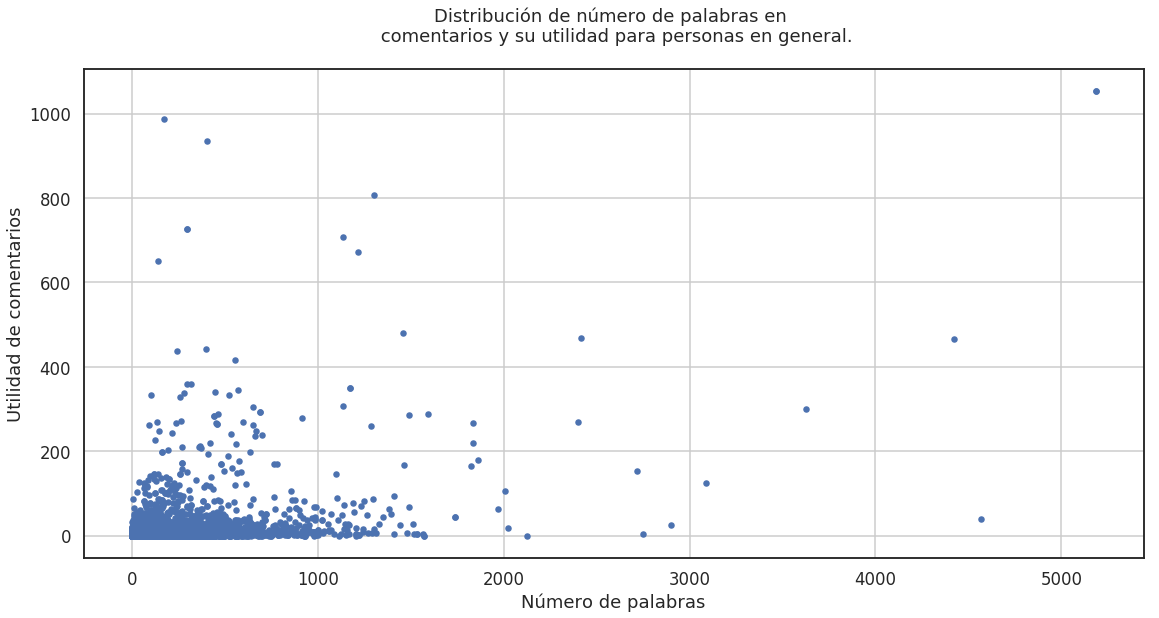

In [38]:
npalabras=df["len Review"]
utilidad=df["Utilidad para personas"]
plt.scatter(npalabras, utilidad, s=25)
#plt.xlim(0, 1000)
#plt.ylim(0, 200)
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Número de palabras")
plt.ylabel("Utilidad de comentarios")
plt.title("Distribución de número de palabras en \n comentarios y su utilidad para personas en general.\n")
plt.grid(True)

plt.show()

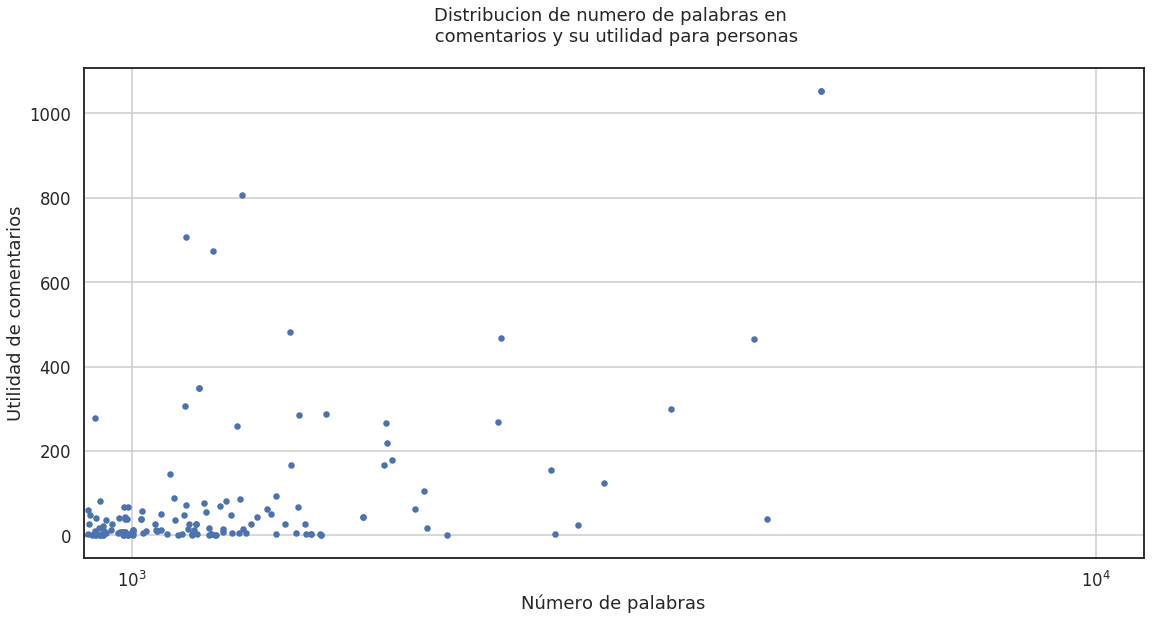

In [39]:
npalabras=df["len Review"]
utilidad=df["Utilidad para personas"]
plt.scatter(npalabras, utilidad, s=25)
#plt.xlim(0, 1000)
#plt.ylim(0, 200)
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Número de palabras")
plt.ylabel("Utilidad de comentarios")
plt.title("Distribucion de numero de palabras en \n comentarios y su utilidad para personas\n")
plt.grid(True)

plt.show()

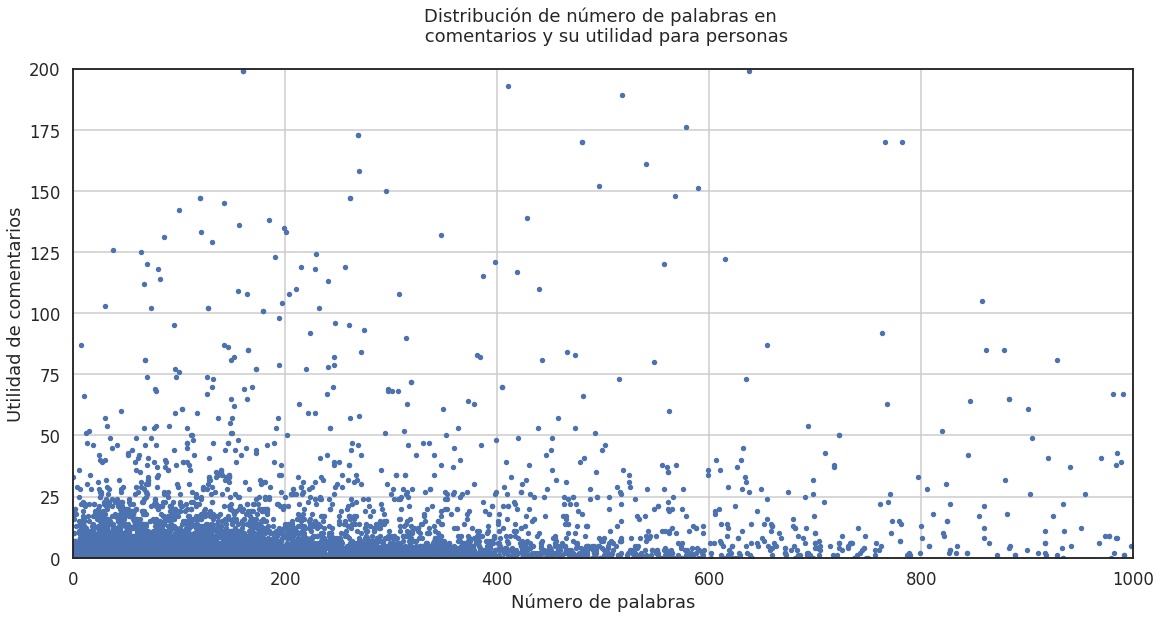

In [40]:
#star=df.iloc[:,8]
#star=df.groupby("len Review")
#start=star["Por usuario"]
#star2=df.iloc[:,14]
#star2=star["Utilidad para personas"].mean()
npalabras=df["len Review"]
utilidad=df["Utilidad para personas"]
plt.scatter(npalabras, utilidad, s=15)
plt.xlim(0, 1000)
plt.ylim(0, 200)
#plt.xscale("logit")
#plt.yscale("logit")
plt.xlabel("Número de palabras")
plt.ylabel("Utilidad de comentarios")
plt.title("Distribución de número de palabras en \n comentarios y su utilidad para personas\n")
plt.grid(True)
plt.show()

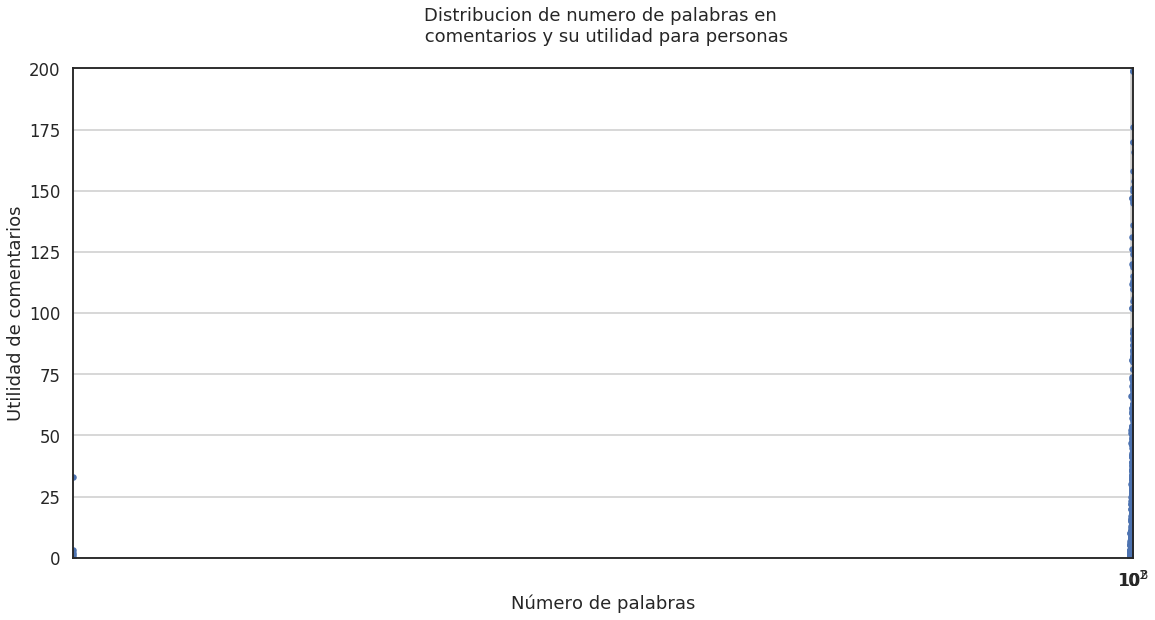

In [0]:
npalabras=df["len Review"]
utilidad=df["Utilidad para personas"]
plt.scatter(npalabras, utilidad, s=25)
plt.xlim(0, 1000)
plt.ylim(0, 200)
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Número de palabras")
plt.ylabel("Utilidad de comentarios")
plt.title("Distribucion de numero de palabras en \n comentarios y su utilidad para personas\n")
plt.grid(True)

plt.show()

<BarContainer object of 30000 artists>

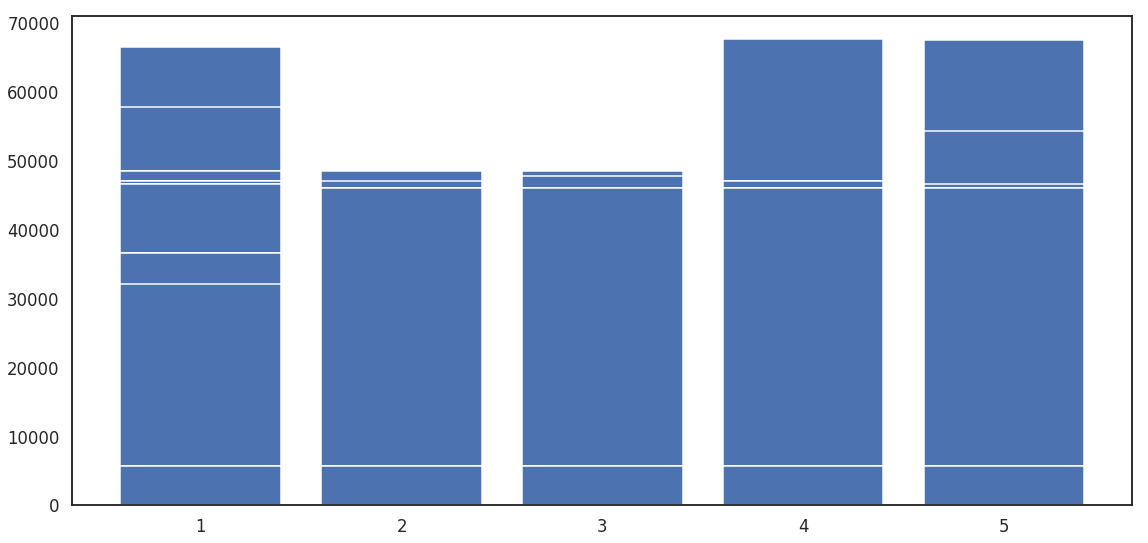

In [274]:
#conComentarios = df[(df["len Review"] > 1) & (df["Utilidad para personas"] >128.0)]
npalabras=df["Precio"]
utilidad=df["Por usuario"]
plt.bar(utilidad, npalabras)

<BarContainer object of 2000 artists>

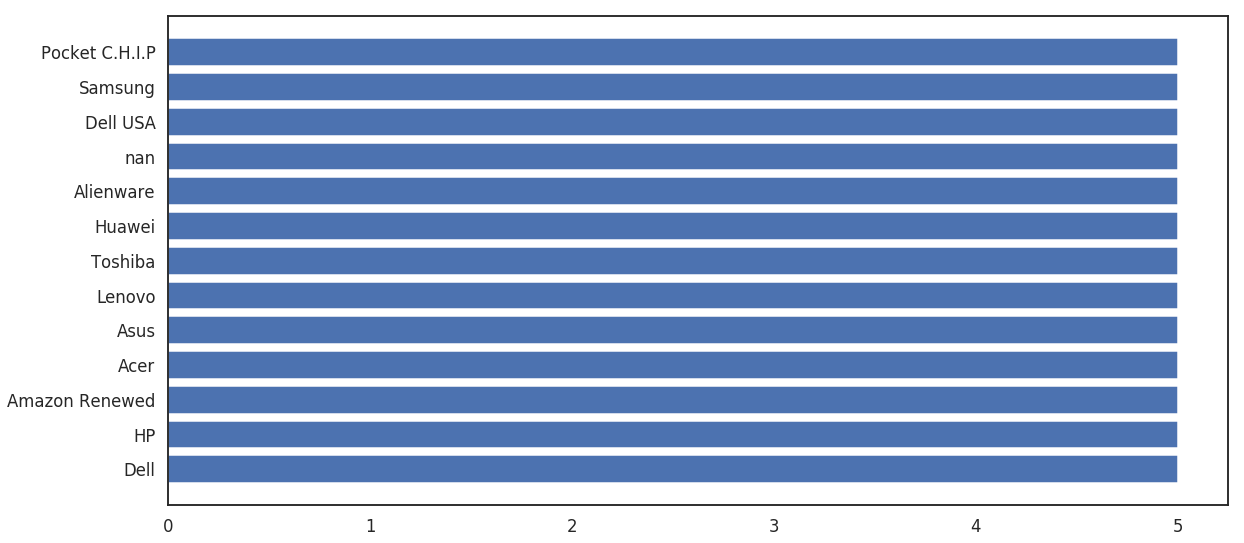

In [44]:
rt=df[df["Por usuario"] == 5.0 ]
npalabras=rt["Por"][:2000]
utilidad=rt["Por usuario"][:2000]
plt.barh(npalabras, utilidad)

In [70]:
df["Por usuario"].value_counts().sort_index()

1.0     4931
2.0     1985
3.0     2088
4.0     4421
5.0    13937
Name: Por usuario, dtype: int64

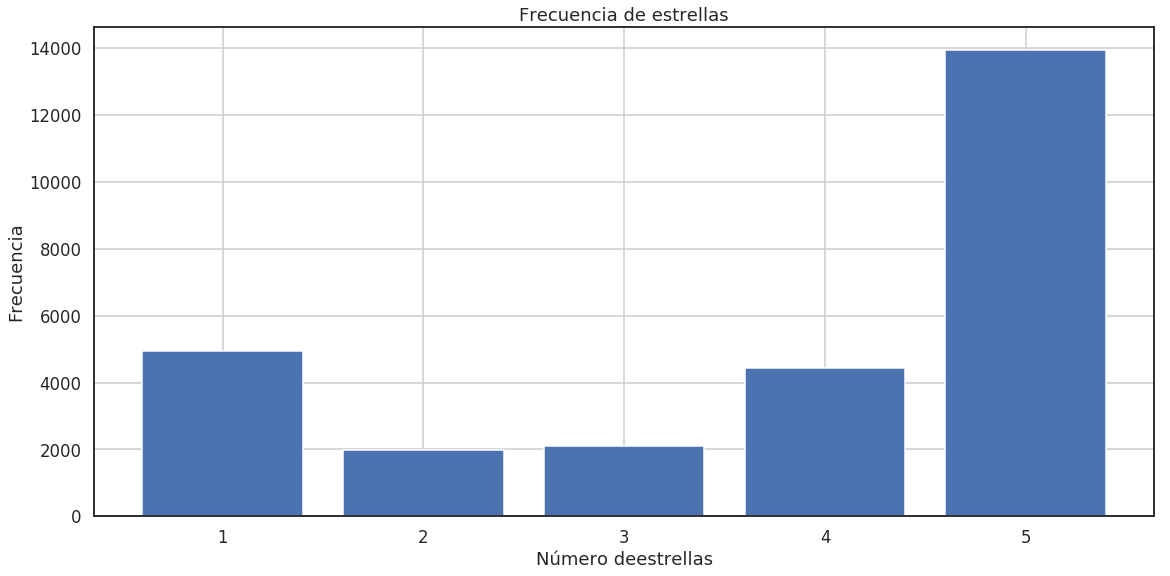

In [77]:
estrellas=[1.0,
2.0 ,
3.0 ,
4.0 ,
5.0 ]
frecuencia=[4931, 1985,2088,4421,13937]
plt.bar(estrellas,frecuencia)
plt.xlabel("Número deestrellas")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de estrellas")
plt.grid(True)
plt.show()


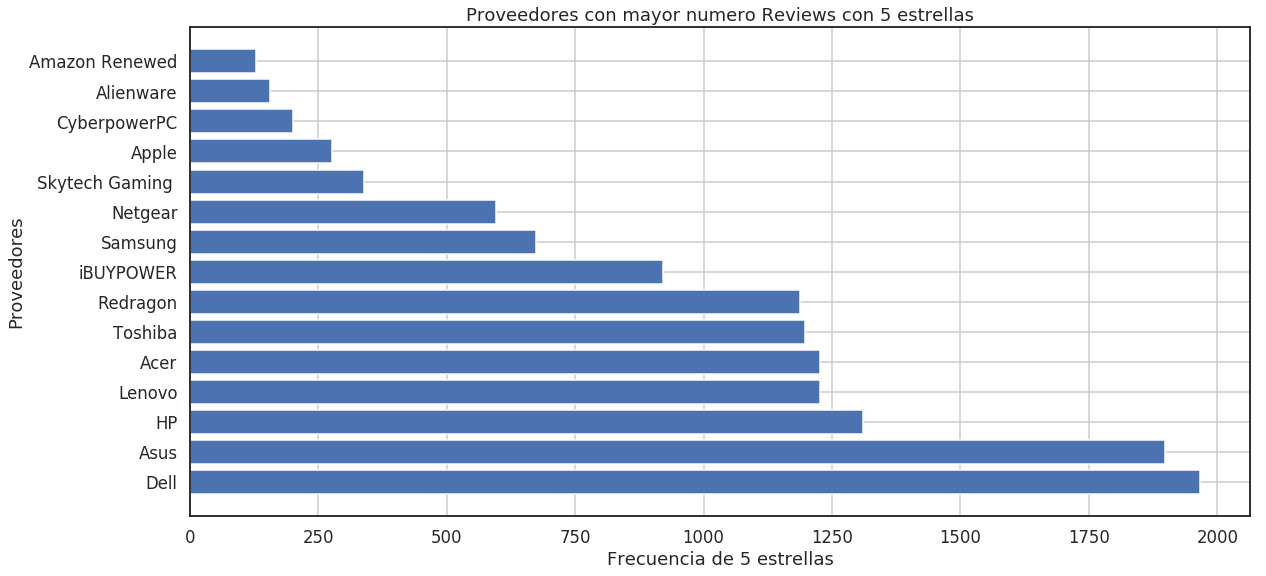

In [68]:
prov=['Dell',
'Asus',
'HP',
'Lenovo' ,
'Acer',
'Toshiba',
'Redragon',
'iBUYPOWER',
'Samsung' ,
'Netgear' ,
'Skytech Gaming ',
'Apple',
'CyberpowerPC',
'Alienware',
'Amazon Renewed']
frecuencia=[1966,1899,1311, 1227,1226
, 1197
,1187
,920
,673
,596
,338
,276
,201
,155,129]
plt.barh(prov,frecuencia)
plt.xlabel("Frecuencia de 5 estrellas")
plt.ylabel("Proveedores")
plt.title("Proveedores con mayor numero Reviews con 5 estrellas")
plt.grid(True)
plt.show()

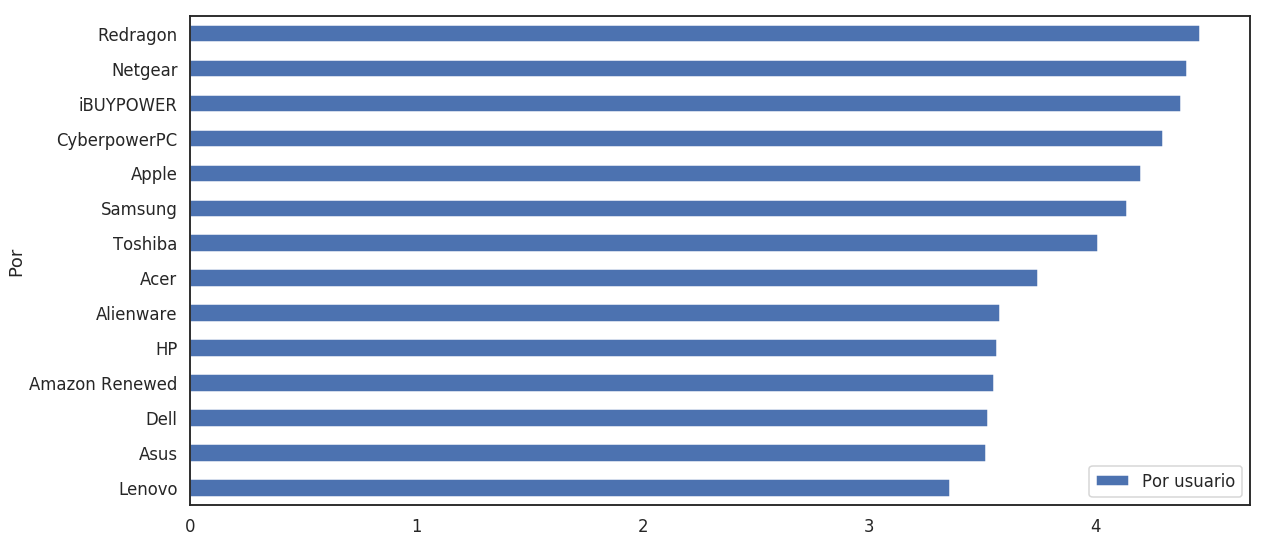

In [268]:
prov=['Dell',
'Asus',
'HP',
'Lenovo' ,
'Acer',
'Toshiba',
'Redragon',
'iBUYPOWER',
'Samsung' ,
'Netgear' ,
'Skytech Gaming ',
'Apple',
'CyberpowerPC',
'Alienware',
'Amazon Renewed']
rt=df[df["Por"].isin(prov) ]
#rt["Por usuario"].mean()
ft=rt.groupby("Por")
lista=ft["Por usuario"].mean().sort_values()
listaDT=pd.DataFrame(lista)
listaDT.plot(kind="barh")
#plt.barh()

In [253]:
ft=df.groupby("Por")
ft["Por usuario"].mean().sort_values()

Por
Keychron                       1.000000
XPS 15                         1.000000
Oemgenuine                     1.400000
Einstart                       1.666667
Dell Computers                 2.000000
AcerTravelMate                 2.250000
Proscan                        2.500000
EVOO                           2.542553
PC                             2.583333
HP Chromebook                  2.917910
Azpen                          2.928571
AST Computer                   3.000000
Acer_Aspire                    3.000000
Acer R13                       3.000000
Aorus                          3.100000
Adamant Computers              3.300000
Lenovo USA                     3.333333
Lenovo                         3.356601
Asus USA                       3.375000
ROG                            3.400000
MSI                            3.402439
VIZIO                          3.458333
Lenovo-Celeron-Laptop          3.500000
Bean Information Technology    3.500000
Dell_Inspiron_i5-8250U         3.500

In [0]:
prov=['Dell',
'Asus',
'HP',
'Lenovo' ,
'Acer',
'Toshiba',
'Redragon',
'iBUYPOWER',
'Samsung' ,
'Netgear' ,
'Skytech Gaming ',
'Apple',
'CyberpowerPC',
'Alienware',
'Amazon Renewed']
frecuencia=[1966,1899,1311, 1227,1226
, 1197
,1187
,920
,673
,596
,338
,276
,201
,155,129]

In [250]:
tr=pd.DataFrame(
    {
        'prov':['Dell','Asus','HP','Lenovo' ,'Acer','Toshiba','Redragon','iBUYPOWER','Samsung' ,'Netgear' ,'Skytech Gaming ','Apple','CyberpowerPC','Alienware','Amazon Renewed'],
'frecuencia':[1966,1899,1311, 1227,1226, 1197,1187,920,673,596,338,276,201,155,129]
    }
)


#data = pd.DataFrame ({
#'length' : [94,74,147,58,86,94,63,86,69,72,128,85,82,86,88,72,74,61,90,89,68,76,114,90,78],
#'weight' : [130,51,640,28,80,110,33,90,36,38,366,84,80,83,70,61,54,44,106,84,39,42,197,102,57]
#})
tr

,prov,frecuencia
0,Dell,1966
1,Asus,1899
2,HP,1311
3,Lenovo,1227
4,Acer,1226
5,Toshiba,1197
6,Redragon,1187
7,iBUYPOWER,920
8,Samsung,673
9,Netgear,596


In [0]:
tr

In [46]:
rt=df[df["Por usuario"] == 5.0 ]
npalabras=rt["Por"]
npalabras.value_counts()


Dell                             1966
Asus                             1899
HP                               1311
Lenovo                           1227
Acer                             1226
Toshiba                          1197
Redragon                         1187
iBUYPOWER                         920
Samsung                           673
Netgear                           596
Skytech Gaming                    338
Apple                             276
CyberpowerPC                      201
Alienware                         155
Amazon Renewed                    129
HP Chromebook                     108
Computer Upgrade King              56
nan                                36
RCA                                31
MSI                                30
EVOO                               22
Havit                              20
LG                                 19
Dell_Inspiron_i5-8250U             18
Lenovo-Celeron-Laptop              18
VIZIO                              18
Huawei      

In [74]:
rt=df[df["Por usuario"] == 1.0 ]
npalabras=rt["Por"]
npalabras.value_counts()

Dell                             993
Asus                             942
Lenovo                           781
HP                               611
Acer                             440
Toshiba                          253
Samsung                          120
HP Chromebook                    108
iBUYPOWER                        103
Netgear                           78
Alienware                         75
Amazon Renewed                    65
Redragon                          61
Skytech Gaming                    53
EVOO                              46
Apple                             42
CyberpowerPC                      21
nan                               19
MSI                               15
RCA                               10
Lenovo-Celeron-Laptop              9
VIZIO                              9
Dell_Inspiron_i5-8250U             9
PC                                 6
Oemgenuine                         6
Azpen                              6
Adamant Computers                  4
H

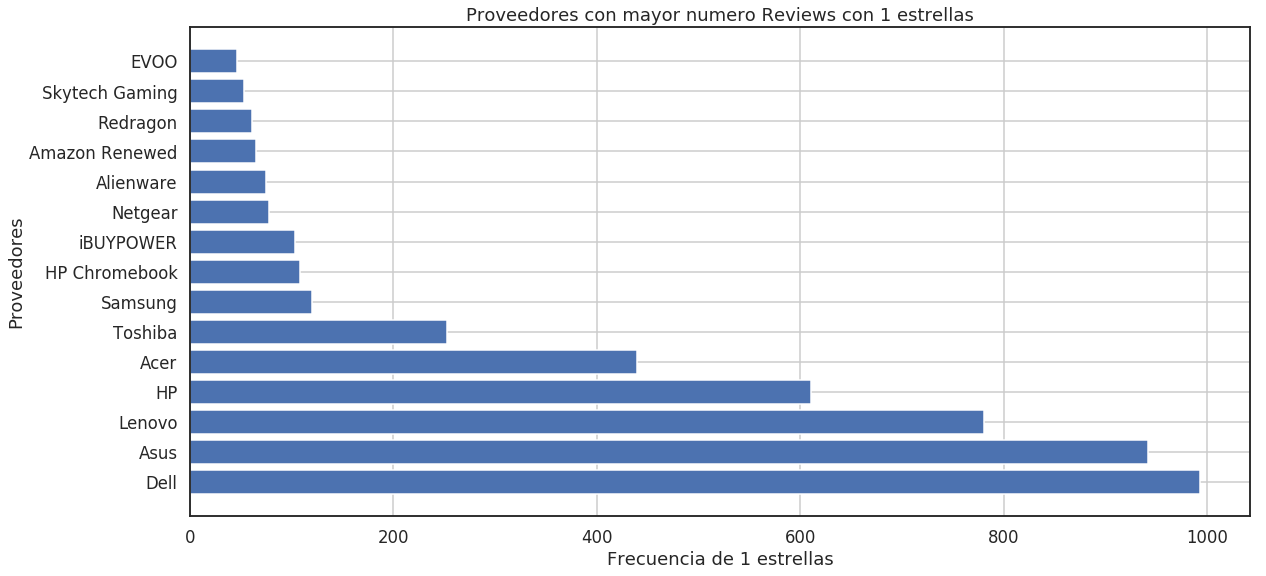

In [76]:
peoresCal=['Dell' ,
'Asus' ,
'Lenovo',
'HP' ,
'Acer' ,
'Toshiba',
'Samsung' ,
'HP Chromebook',
'iBUYPOWER',
'Netgear',
'Alienware' ,
'Amazon Renewed' ,
'Redragon'  ,
'Skytech Gaming',
'EVOO']
frecuencia1=[993,942, 781,611,440,253,120,108,103,78,75,65,61,53,46]
plt.barh(peoresCal,frecuencia1)
plt.xlabel("Frecuencia de 1 estrellas")
plt.ylabel("Proveedores")
plt.title("Proveedores con mayor numero Reviews con 1 estrellas")
plt.grid(True)
plt.show()

In [0]:
rt=df[df["Por usuario"] == 5.0].groupby("Por")
rt.head()

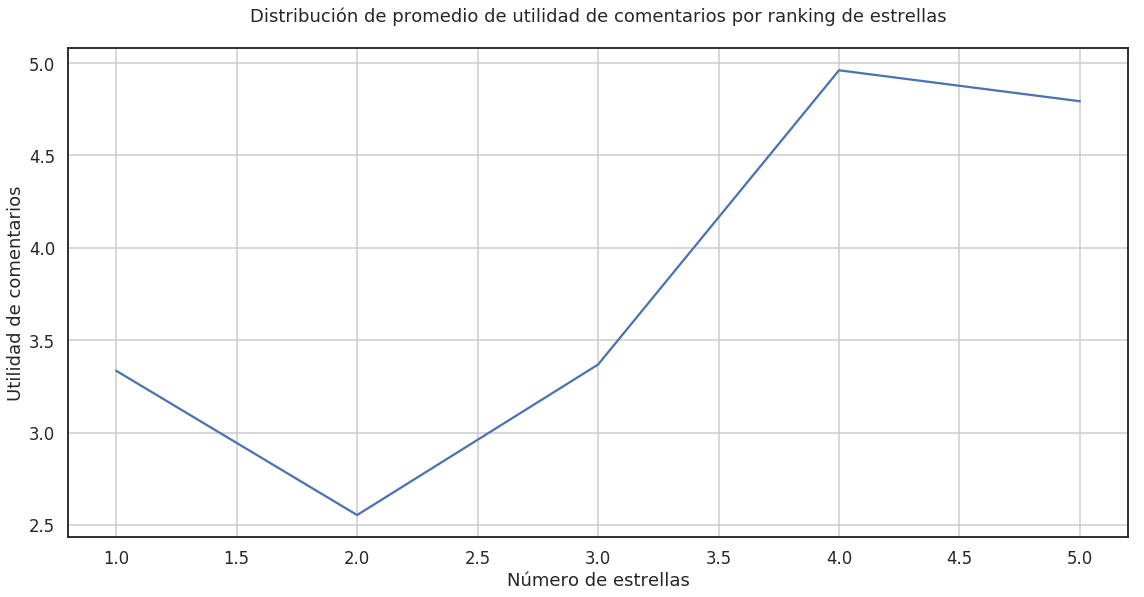

In [48]:
#star=df.iloc[:,8]
star=df.groupby("Por usuario")
#start=star["Por usuario"]
#star2=df.iloc[:,14]
star2=star["Utilidad para personas"].mean()
plt.plot(star2)
plt.xlabel("Número de estrellas")
plt.ylabel("Utilidad de comentarios")
plt.title("Distribución de promedio de utilidad de comentarios por ranking de estrellas\n")
plt.grid(True)
plt.show()

In [0]:
#star=df.iloc[:,8]
star=df.groupby("Por usuario")
start=star["Por usuario"]
#star2=df.iloc[:,14]
star2=star["len Review"].mean()
plt.plot(star2)

In [0]:
Ndf=df[df["Por usuario"] != "nan"]
dfid=Ndf.groupby("ID")

dfComMax=dfid["Por usuario"].mean()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
rt = pd.DataFrame(dfComMax)
listaMejores = rt[rt['Por usuario']==5.0].index.values
listaMejores

array(['B01B1YYLSK', 'B01DAS3604', 'B01MQRQ2B1', 'B01MS95O07',
       'B01N3AFFEH', 'B0725XJ633', 'B077GZKM9Z', 'B078TJ2Z7R',
       'B078WRQ63T', 'B0793BM1LY', 'B079Y8LHJN', 'B07C3F7HND',
       'B07D8DQTGN', 'B07DN3JNP6', 'B07FJ92JNV', 'B07FN7PLZN',
       'B07HRJZY9D', 'B07HXZJ58Y', 'B07JF1PCFM', 'B07JGGVDJ2',
       'B07L4Y6R6Y', 'B07Q13XR2H', 'B07QG8M9WJ', 'B07QX4QR2Z',
       'B07R3H3PL3', 'B07R64RC7R', 'B07RC4PJ4J', 'B07RJLXWDK',
       'B07S7PV8J4', 'B07S8S47KB'], dtype=object)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


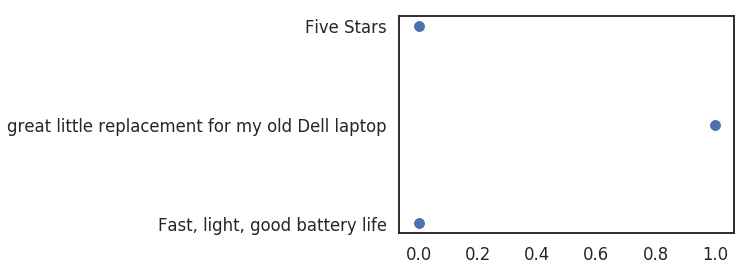

In [0]:
mejorProducto = df[ (df["ID"]=='B01N3AFFEH') & (df["Por usuario"] != "nan") ]
dt=mejorProducto["Titulo review"]
dtr=mejorProducto["Utilidad para personas"]
plt.scatter(dtr,dt)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


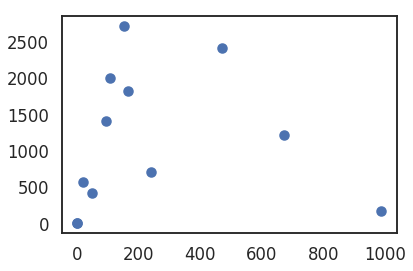

In [0]:
mejorProducto = df[ (df["ID"]=='B00ZS4HK0Q') & (df["Por usuario"] != "nan") ]
dt=mejorProducto["len Review"]
dtr=mejorProducto["Utilidad para personas"]
plt.scatter(dtr,dt)

In [0]:
productoConMejorUtilidad = df[df["ID"]=='B00ZS4HK0Q']
productoConMejorUtilidad

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


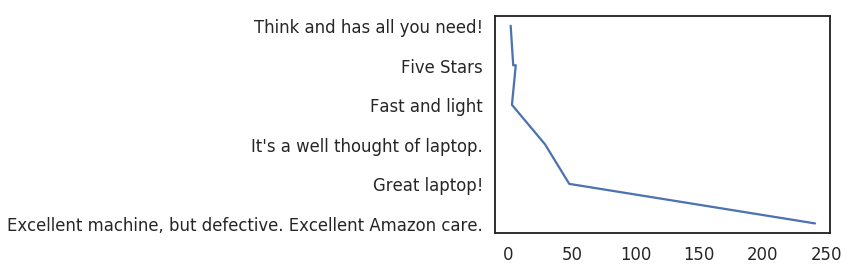

In [0]:
mejorProducto = df[ (df["ID"]=='B01DAS3604') & (df["Por usuario"] != "nan") ]
dt=mejorProducto["Titulo review"]
dtr=mejorProducto["len Review"]
plt.plot(dtr,dt)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


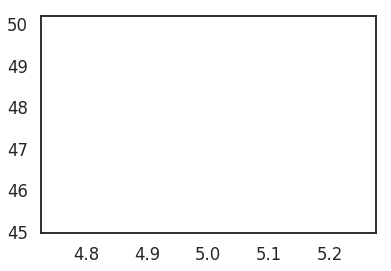

In [0]:
mejorProducto = df[ (df["ID"]=='B01DAS3604') & (df["Por usuario"] != "nan") ]
mejorPComentarios=mejorProducto.groupby("Por usuario")
ploMejorPC =mejorPComentarios["len Review"].mean()
plt.plot(ploMejorPC,label=id)

In [0]:
df.tail()

,Link,ID,Producto,Por,Cantidades de comentarios,Precio,Precio recomendado,Nombre alternativo,Por usuario,Fecha de review,Titulo review,Review,Utilidad para personas,Words Review,len Review
9995,https://www.amazon.com.mx/dp/B01CJJWE2G,B01CJJWE2G,"HP Pavilion 2016 Laptop PC 15 Premium, 15.6"", ...",por HP,134.0,18499.0,NaN,"$18,499.00,Envío en 3 a 4 días.,$18,499.00",NaN,NaN,NaN,nan,0,[nan],1
9996,https://www.amazon.com.mx/dp/B01CJJWE2G,B01CJJWE2G,"HP Pavilion 2016 Laptop PC 15 Premium, 15.6"", ...",por HP,134.0,18499.0,NaN,"$18,499.00,Envío en 3 a 4 días.,$18,499.00",4.0,2016-06-20,Four Stars,Yes it was what I was looking for in a laptop....,2,"[yes, it, was, what, i, was, looking, for, in,...",15
9997,https://www.amazon.com.mx/dp/B01CJJWE2G,B01CJJWE2G,"HP Pavilion 2016 Laptop PC 15 Premium, 15.6"", ...",por HP,134.0,18499.0,NaN,"$18,499.00,Envío en 3 a 4 días.,$18,499.00",5.0,2016-10-18,Five Stars,"Beautiful screen, runs fast. Still learning t...",0,"[beautiful, screen, runs, fast, still, learnin...",10
9998,https://www.amazon.com.mx/dp/B01CJJWE2G,B01CJJWE2G,"HP Pavilion 2016 Laptop PC 15 Premium, 15.6"", ...",por HP,134.0,18499.0,NaN,"$18,499.00,Envío en 3 a 4 días.,$18,499.00",5.0,2016-05-05,Five Stars,Great PC,0,"[great, pc]",2
9999,https://www.amazon.com.mx/dp/B01CJJWE2G,B01CJJWE2G,"HP Pavilion 2016 Laptop PC 15 Premium, 15.6"", ...",por HP,134.0,18499.0,NaN,"$18,499.00,Envío en 3 a 4 días.,$18,499.00",5.0,2016-08-20,Five Stars,Thank you,0,"[thank, you]",2


In [0]:
conComentarios =df[df["Review"] != "nan"]
star=conComentarios.groupby("len Review")
#start=star["Por usuario"]
#star2=df.iloc[:,14]
star2=star["Utilidad para personas"].mean()
plt.scatter(star2)

TypeError: ignored

In [0]:
conComentarios =df[df["len Review"] != 1]
star=conComentarios.groupby("Por usuario")
#start=star["Por usuario"]
#star2=df.iloc[:,14]
star2=star["Utilidad para personas"].mean()
plt.plot(star2)

In [0]:
conComentarios = df[(df["len Review"] != 1) & (df["Utilidad para personas"] != 0)]
conComentarios

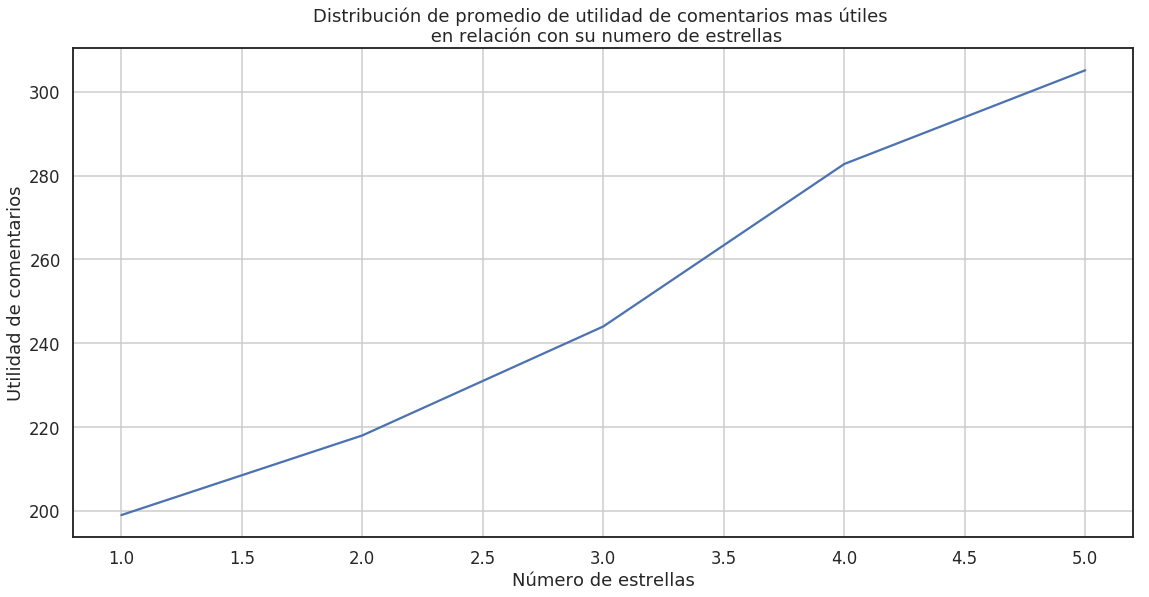

In [247]:
conComentarios = df[(df["len Review"] > 1) & (df["Utilidad para personas"] >128.0)]
star=conComentarios.groupby("Por usuario")
#start=star["Por usuario"]
#star2=df.iloc[:,14]
star2=star["Utilidad para personas"].mean()
plt.plot(star2)
plt.xlabel("Número de estrellas")
plt.ylabel("Utilidad de comentarios")
plt.title("Distribución de promedio de utilidad de comentarios mas útiles \n en relación con su numero de estrellas")
plt.grid(True)
plt.show()

In [0]:
palabrasIngles = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves',
 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's",
 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was',
 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did',
 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', '’',"''",'$','nan','when','``','can','could','then']

frecuencia de palabras frases de los comentarios arriba del promedio de utilidad

In [85]:
conComentarios = df[(df["len Review"] > 1) & (df["Utilidad para personas"] >128.0)]
peoresComentarios=[]
#junta todos los comentarios
for i in range(0,len(conComentarios )):
  r= conComentarios.iloc[i,13]
  peoresComentarios=peoresComentarios+r
peoresComentarios
#quita palabras mas comunes, pronombres, etc
mejoresComentarios =[word for word in peoresComentarios if word.lower() not in palabrasIngles]
mejoresComentarios
#se obtiene frecuencia de palabras
fdist = FreqDist()
for word in mejoresComentarios:
  fdist[word.lower()]+=1
fdist
#se obtienen las palabras mas comunes, el numero que quieras
fdistTop10 = fdist.most_common(100)
fdistTop10

[('on', 814),
 ('in', 752),
 ('not', 525),
 ("'s", 474),
 ("n't", 433),
 ('laptop', 368),
 ('all', 319),
 ('so', 313),
 ('keyboard', 309),
 ('like', 262),
 ('chromebook', 255),
 ('very', 251),
 ('would', 236),
 ('one', 230),
 ('screen', 224),
 ('just', 223),
 ('use', 222),
 ('more', 222),
 ('than', 218),
 ('will', 216),
 ('up', 211),
 ('there', 197),
 ('good', 196),
 ('get', 188),
 ('also', 185),
 ('no', 183),
 ('toshiba', 181),
 ('even', 175),
 ('some', 172),
 ('gb', 171),
 ('windows', 165),
 ('much', 158),
 ('well', 155),
 ('out', 149),
 ('great', 149),
 ('really', 148),
 ('only', 136),
 ('nice', 133),
 ('battery', 132),
 ('better', 132),
 ('time', 131),
 ('other', 130),
 ('any', 130),
 ('computer', 124),
 ('display', 123),
 ('machine', 118),
 ("'ve", 115),
 ("'m", 115),
 ('pc', 114),
 ('still', 113),
 ('now', 110),
 ('new', 108),
 ('little', 108),
 ('drive', 107),
 ('work', 106),
 ('bit', 104),
 ('most', 104),
 ('using', 103),
 ('chromebooks', 103),
 ('google', 101),
 ('usb', 98),
 

In [0]:
[('laptop', 368),
 ('all', 319),
 ('keyboard', 309),
 ('like', 262),
 ('chromebook', 255),
 ('very', 251),
 ('screen', 224),
 ('use', 222),
 ('more', 222),
 ('good', 196),
 ('get', 188),
 ('no', 183),
 ('toshiba', 181),
 ('even', 175),
 ('some', 172),
 ('gb', 171),
 ('windows', 165),
 ('much', 158),
 ('well', 155),
 ('great', 149),
 ('really', 148),
 ('only', 136),
 ('nice', 133),
 ('battery', 132),
 ('better', 132),
 ('time', 131),
 ('other', 130),
 ('any', 130),
 ('computer', 124),
 ('display', 123),
 ('machine', 118),
 ('pc', 114),
 ('still', 113),
 ('now', 110),
 ('new', 108),
 ('little', 108),
 ('drive', 107),
 ('work', 106),
 ('bit', 104),
 ('most', 104),
 ('using', 103),
 ('chromebooks', 103),
 ('google', 101),
 ('usb', 98),
 ('review', 98),
 ('first', 98),
 ('hours', 97),
 ('acer', 95),
 ('os', 95),
 ('model', 94),
 ('chrome', 94),
 ('same', 93),
 ('need', 93),
 ('used', 91),
 ('right', 91),
 ('pretty', 88),
 ('touch', 88),
 ('may', 88),
 ('life', 86),
 ('price', 86),
 ('performance', 85),
 ('power', 85),
 ('update', 84),
 ('lot', 83),
 ('how', 82),
 ('make', 80),
 ('see', 80),
 ('asus', 80),
 ('back', 79),
 ('off', 78),
 ('ssd', 78),
 ('works', 77),
 ('around', 76),
 ('want', 76),
 ('full', 75),
 ('over', 75),
 ('few', 74),
 ('something', 74),
 ('processor', 73),
 ('x', 71),
 ('say', 71)]

In [0]:
caracteristicas mas repetidas en comentarios mas repetidas

In [86]:
conComentarios = df[(df["len Review"] > 1) & (df["Utilidad para personas"] >128.0)]
peoresComentarios=[]
#junta todos los comentarios
for i in range(0,len(conComentarios )):
  r= conComentarios.iloc[i,13]
  peoresComentarios=peoresComentarios+r
peoresComentarios

mejoresComentarios =[word for word in peoresComentarios if word.lower() not in palabrasIngles]
mejoresComentarios

frase2w = list(nltk.ngrams(mejoresComentarios,2))
frase2w

fdist = FreqDist()
for word in frase2w:
  fdist[word]+=1
fdist
#se obtienen las palabras mas comunes, el numero que quieras
fdistTop10 = fdist.most_common(100)
fdistTop10

[(('battery', 'life'), 76),
 (('chrome', 'os'), 63),
 (('ca', "n't"), 49),
 (('more', 'than'), 42),
 (('toshiba', 'chromebook'), 39),
 (("'s", 'not'), 38),
 (('gb', 'ram'), 35),
 (('hard', 'drive'), 31),
 (('acer', 'c'), 30),
 (('touch', 'screen'), 29),
 (('better', 'than'), 28),
 (('click', 'on'), 25),
 (('full', 'hd'), 23),
 (('there', "'s"), 23),
 (('usb', 'ports'), 21),
 (('so', 'far'), 21),
 (('mechanical', 'keyboard'), 21),
 (('sd', 'card'), 20),
 (('ips', 'display'), 19),
 (('new', 'toshiba'), 19),
 (('there', 'no'), 19),
 (('viewing', 'angles'), 19),
 (('wo', "n't"), 19),
 (('all', 'chromebooks'), 19),
 (('may', 'not'), 19),
 (("'m", 'not'), 19),
 (('very', 'good'), 18),
 (('macbook', 'air'), 18),
 (('cherry', 'mx'), 18),
 (('pretty', 'much'), 17),
 (('google', 'chromebook'), 17),
 (('on', 'screen'), 17),
 (('on', 'amazon'), 17),
 (('same', 'time'), 17),
 (('tablet', 'mode'), 17),
 (('other', 'chromebooks'), 16),
 (('on', 'new'), 16),
 (('in', 'all'), 16),
 (("n't", 'really'), 

In [0]:
listaParaCSV= [(('battery', 'life'), 76),
 (('chrome', 'os'), 63),
 (('ca', "n't"), 49),
 (('more', 'than'), 42),
 (('toshiba', 'chromebook'), 39),
 (("'s", 'not'), 38),
 (('gb', 'ram'), 35),
 (('hard', 'drive'), 31),
 (('acer', 'c'), 30),
 (('touch', 'screen'), 29),
 (('better', 'than'), 28),
 (('click', 'on'), 25),
 (('full', 'hd'), 23),
 (('there', "'s"), 23),
 (('usb', 'ports'), 21),
 (('so', 'far'), 21),
 (('mechanical', 'keyboard'), 21),
 (('sd', 'card'), 20),
 (('ips', 'display'), 19),
 (('new', 'toshiba'), 19),
 (('there', 'no'), 19),
 (('viewing', 'angles'), 19),
 (('wo', "n't"), 19),
 (('all', 'chromebooks'), 19),
 (('may', 'not'), 19),
 (("'m", 'not'), 19),
 (('very', 'good'), 18),
 (('macbook', 'air'), 18),
 (('cherry', 'mx'), 18),
 (('pretty', 'much'), 17),
 (('google', 'chromebook'), 17),
 (('on', 'screen'), 17),
 (('on', 'amazon'), 17),
 (('same', 'time'), 17),
 (('tablet', 'mode'), 17),
 (('other', 'chromebooks'), 16),
 (('on', 'new'), 16),
 (('in', 'all'), 16),
 (("n't", 'really'), 16),
 (('will', 'not'), 16),
 (('in', 'terms'), 16),
 (('first', 'gen'), 16),
 (('on', 'laptop'), 16),
 (('not', 'so'), 16),
 (('not', 'sure'), 16),
 (('on', 'bottom'), 15),
 (('out', 'there'), 15),
 (('gb', 'ssd'), 15),
 (("'s", 'just'), 15),
 (('chromebook', 'flip'), 15),
 (('works', 'great'), 15),
 (('track', 'pad'), 15),
 (('than', 'original'), 14),
 (('original', 'toshiba'), 14),
 (('c', 'gb'), 14),
 (('very', 'well'), 14),
 (('just', 'like'), 14),
 (('very', 'nice'), 14),
 (('update', 'review'), 14),
 (('right', 'now'), 14),
 (('less', 'than'), 14),
 (('so', 'much'), 14),
 (('in', 'opinion'), 14),
 (('would', 'recommend'), 14),
 (('much', 'more'), 13),
 (('much', 'better'), 13),
 (('bit', 'more'), 13),
 (('build', 'quality'), 13),
 (('price', 'point'), 13),
 (('in', 'laptop'), 13),
 (('microsoft', 'office'), 13),
 (('plugged', 'in'), 12),
 (('based', 'on'), 12),
 (('beta', 'channel'), 12),
 (('just', 'fine'), 12),
 (('not', 'too'), 12),
 (('on', 'chromebook'), 12),
 (('all', 'way'), 12),
 (('think', "'s"), 12),
 (('not', 'much'), 12),
 (('macbook', 'pro'), 12),
 (('typing', 'on'), 12),
 (('surface', 'pro'), 12),
 (('there', 'also'), 11),
 (('backlit', 'keyboard'), 11),
 (("n't", 'like'), 11),
 (('on', 'desktop'), 11),
 (('even', 'though'), 11),
 (('few', 'days'), 11),
 (('on', 'keyboard'), 11),
 (('works', 'well'), 11),
 (('asus', 'c'), 11),
 (('will', 'update'), 11),
 (('so', "n't"), 11),
 (('asus', 'chromebook'), 11),
 (('not', 'bad'), 11),
 (('doesn', 't'), 11),
 (("n't", 'get'), 11),
 (('out', 'box'), 11),
 (('make', 'sure'), 11)]
 

In [0]:
datos = pd.DataFrame(listaParaCSV)
datos.to_csv('/content/frasesMasRepetidas.csv')

In [275]:
pwd

'/content'

In [87]:
conComentarios = df[(df["len Review"] > 1) & (df["Utilidad para personas"] >128.0)]
peoresComentarios=[]
#junta todos los comentarios
for i in range(0,len(conComentarios )):
  r= conComentarios.iloc[i,13]
  peoresComentarios=peoresComentarios+r
peoresComentarios

mejoresComentarios =[word for word in peoresComentarios if word.lower() not in palabrasIngles]
mejoresComentarios

frase2w = list(nltk.ngrams(mejoresComentarios,3))
frase2w

fdist = FreqDist()
for word in frase2w:
  fdist[word]+=1
fdist
#se obtienen las palabras mas comunes, el numero que quieras
fdistTop10 = fdist.most_common(100)
fdistTop10

[(('asus', 'chromebook', 'flip'), 10),
 (('acer', 'c', 'gb'), 9),
 (('on', 'new', 'toshiba'), 9),
 (('original', 'toshiba', 'chromebook'), 8),
 (('gb', 'ram', 'gb'), 8),
 (('hours', 'battery', 'life'), 8),
 (('there', "'s", 'no'), 8),
 (('chrome', 'os', 'devices'), 7),
 (('sd', 'card', 'slot'), 7),
 (('will', 'update', 'review'), 7),
 (('in', 'tablet', 'mode'), 7),
 (("'m", 'not', 'sure'), 7),
 (('x', 'ips', 'display'), 6),
 (('pretty', 'much', 'same'), 6),
 (('great', 'viewing', 'angles'), 6),
 (('releases', 'chrome', 'os'), 6),
 (('first', 'gen', 'model'), 6),
 (('here', 'on', 'amazon'), 6),
 (('much', 'better', 'than'), 6),
 (('bootable', 'backup', 'rescue'), 6),
 (('backup', 'rescue', 'disk'), 6),
 (('intel', 'core', 'iu'), 6),
 (('chrome', 'os', 'will'), 5),
 (('so', 'wo', "n't"), 5),
 (('in', 'day', 'day'), 5),
 (('day', 'day', 'use'), 5),
 (('ca', "n't", 'really'), 5),
 (('on', 'all', 'chromebooks'), 5),
 (('ca', "n't", 'say'), 5),
 (('google', 'play', 'music'), 5),
 (('core', '

frecuencia de palabras frases de los comentarios que no fueron utiles a una persona

In [0]:
conComentarios = df[df["Utilidad para personas"] == 0]
peoresComentarios=[]
#junta todos los comentarios
for i in range(0,len(conComentarios )):
  r= conComentarios.iloc[i,13]
  peoresComentarios=peoresComentarios+r
peoresComentarios
#quita palabras mas comunes, pronombres, etc
mejoresComentarios =[word for word in peoresComentarios if word.lower() not in palabrasIngles]
mejoresComentarios
#se obtiene frecuencia de palabras
fdist = FreqDist()
for word in mejoresComentarios:
  fdist[word.lower()]+=1
fdist
#se obtienen las palabras mas comunes, el numero que quieras
fdistTop10 = fdist.most_common(100)
fdistTop10

In [57]:
conComentarios = df[df["Utilidad para personas"] == 0]
peoresComentarios=[]
#junta todos los comentarios
for i in range(0,len(conComentarios )):
  r= conComentarios.iloc[i,13]
  peoresComentarios=peoresComentarios+r
peoresComentarios

mejoresComentarios =[word for word in peoresComentarios if word.lower() not in palabrasIngles]
mejoresComentarios

frase2w = list(nltk.ngrams(mejoresComentarios,2))
frase2w

fdist = FreqDist()
for word in frase2w:
  fdist[word]+=1
fdist
#se obtienen las palabras mas comunes, el numero que quieras
fdistTop10 = fdist.most_common(100)
fdistTop10

[(('so', 'far'), 629),
 (('ca', "n't"), 470),
 (('mechanical', 'keyboard'), 378),
 (('battery', 'life'), 349),
 (('very', 'good'), 336),
 (('set', 'up'), 276),
 (('works', 'great'), 253),
 (('hard', 'drive'), 253),
 (('more', 'than'), 237),
 (('can', 'not'), 203),
 (('very', 'happy'), 198),
 (('wo', "n't"), 196),
 (("'s", 'not'), 195),
 (('touch', 'screen'), 192),
 (('would', 'not'), 177),
 (('less', 'than'), 176),
 (('out', 'box'), 174),
 (('great', 'laptop'), 165),
 (('very', 'nice'), 161),
 (('customer', 'service'), 159),
 (("'m", 'not'), 155),
 (('better', 'than'), 153),
 (('very', 'fast'), 149),
 (('there', 'no'), 148),
 (('no', 'issues'), 147),
 (('other', 'than'), 147),
 (('would', 'recommend'), 146),
 (('great', 'computer'), 143),
 (('would', "n't"), 143),
 (('great', 'price'), 142),
 (('highly', 'recommend'), 141),
 (('will', 'not'), 137),
 (('graphics', 'card'), 137),
 (('easy', 'use'), 136),
 (("n't", 'work'), 135),
 (('very', 'well'), 134),
 (('great', 'product'), 131),
 ((

In [58]:
conComentarios = df[df["Utilidad para personas"] == 0]
peoresComentarios=[]
#junta todos los comentarios
for i in range(0,len(conComentarios )):
  r= conComentarios.iloc[i,13]
  peoresComentarios=peoresComentarios+r
peoresComentarios

mejoresComentarios =[word for word in peoresComentarios if word.lower() not in palabrasIngles]
mejoresComentarios

frase2w = list(nltk.ngrams(mejoresComentarios,3))
frase2w

fdist = FreqDist()
for word in frase2w:
  fdist[word]+=1
fdist
#se obtienen las palabras mas comunes, el numero que quieras
fdistTop10 = fdist.most_common(100)
fdistTop10

[(('easy', 'set', 'up'), 97),
 (('so', 'far', 'so'), 93),
 (('far', 'so', 'good'), 93),
 (('right', 'out', 'box'), 68),
 (('first', 'mechanical', 'keyboard'), 57),
 (('very', 'happy', 'purchase'), 43),
 (('would', 'definitely', 'recommend'), 42),
 (('all', 'in', 'all'), 42),
 (('ca', "n't", 'beat'), 40),
 (("'m", 'not', 'sure'), 40),
 (('would', 'highly', 'recommend'), 38),
 (('will', 'never', 'buy'), 36),
 (('in', 'less', 'than'), 35),
 (('less', 'than', 'year'), 32),
 (('would', 'not', 'recommend'), 32),
 (('great', 'so', 'far'), 31),
 (('cherry', 'mx', 'blue'), 29),
 (('very', 'good', 'laptop'), 28),
 (('there', "'s", 'no'), 28),
 (('so', 'ca', "n't"), 28),
 (('so', 'far', 'great'), 26),
 (('great', 'battery', 'life'), 26),
 (('would', 'buy', 'again'), 26),
 (('ca', "n't", 'even'), 26),
 (('first', 'gaming', 'pc'), 26),
 (('would', 'recommend', 'anyone'), 25),
 (('not', 'big', 'deal'), 25),
 (('problems', 'so', 'far'), 24),
 (('only', 'thing', "n't"), 24),
 (('much', 'better', 'than

frecuencia de palabras frases de los comentarios que no le fueron utiles a alguna persona

In [0]:
conComentarios = df[df["Utilidad para personas"] == 0]
peoresComentarios=[]
#junta todos los comentarios
for i in range(0,len(conComentarios )):
  r= conComentarios.iloc[i,13]
  peoresComentarios=peoresComentarios+r
peoresComentarios
#quita palabras mas comunes, pronombres, etc
mejoresComentarios =[word for word in peoresComentarios if word.lower() not in palabrasIngles]
mejoresComentarios
#se obtiene frecuencia de palabras
fdist = FreqDist()
for word in mejoresComentarios:
  fdist[word.lower()]+=1
fdist
#se obtienen las palabras mas comunes, el numero que quieras
fdistTop10 = fdist.most_common(50)
fdistTop10

In [0]:
conComentarios = df[df["Utilidad para personas"] == 0]
peoresComentarios=[]
#junta todos los comentarios
for i in range(0,len(conComentarios )):
  r= conComentarios.iloc[i,13]
  peoresComentarios=peoresComentarios+r
peoresComentarios

mejoresComentarios =[word for word in peoresComentarios if word.lower() not in palabrasIngles]
mejoresComentarios

frase2w = list(nltk.ngrams(mejoresComentarios,2))
frase2w

fdist = FreqDist()
for word in frase2w:
  fdist[word]+=1
fdist
#se obtienen las palabras mas comunes, el numero que quieras
fdistTop10 = fdist.most_common(50)
fdistTop10

In [0]:
r=['very fast',
 'even though',
 'very nice',
 'nt get',
 'so can']
 drt=[101, 98, 97,96, 96]

IndentationError: ignored

In [0]:
plt.barh(r,drt)

NameError: ignored

In [0]:
plt.barh(fdistTop10)

TypeError: ignored

In [0]:
#star=df.iloc[:,8]
star=df.groupby("Por usuario")
#start=star["Por usuario"]
#star2=df.iloc[:,14]
star2=star["Utilidad para personas"].mean()
#plt.plot(star2)
star2

Por usuario
1.0    3.085450
2.0    2.200837
3.0    2.422695
4.0    3.280083
5.0    3.459801
Name: Utilidad para personas, dtype: float64

In [0]:
#star=df.groupby("Por usuario")
st = df[(df["len Review"] != 1) & (df["Utilidad para personas"] != 0)]
start=st.groupby("Por usuario")
#star2=df.iloc[:,14]
star2=star["Utilidad para personas"].mean()
plt.scatter(star2)
#star2

TypeError: ignored

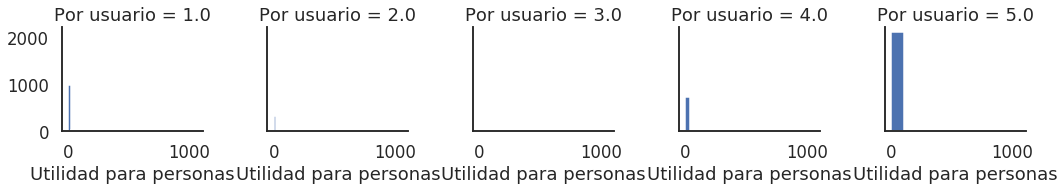

In [0]:
st = df[(df["len Review"] != 1) & (df["Utilidad para personas"] != 0)]
g = sns.FacetGrid(data=st, col='Por usuario')
g.map(plt.hist, 'Utilidad para personas', bins=10)

In [80]:
utiles= df[df["Utilidad para personas"] >128.0]
utiles["len Review"].mean()

769.8333333333334

In [0]:
listaP= [('laptop', 368),
 ('all', 319),
 ('keyboard', 309),
 ('like', 262),
 ('chromebook', 255),
 ('very', 251),
 ('screen', 224),
 ('use', 222),
 ('more', 222),
 ('good', 196),
 ('get', 188),
 ('no', 183),
 ('toshiba', 181),
 ('even', 175),
 ('some', 172),
 ('gb', 171),
 ('windows', 165),
 ('much', 158),
 ('well', 155),
 ('great', 149),
 ('really', 148),
 ('only', 136),
 ('nice', 133),
 ('battery', 132),
 ('better', 132),
 ('time', 131),
 ('other', 130),
 ('any', 130),
 ('computer', 124),
 ('display', 123),
 ('machine', 118),
 ('pc', 114),
 ('still', 113),
 ('now', 110),
 ('new', 108),
 ('little', 108),
 ('drive', 107),
 ('work', 106),
 ('bit', 104),
 ('most', 104),
 ('using', 103),
 ('chromebooks', 103),
 ('google', 101),
 ('usb', 98),
 ('review', 98),
 ('first', 98),
 ('hours', 97),
 ('acer', 95),
 ('os', 95),
 ('model', 94),
 ('chrome', 94),
 ('same', 93),
 ('need', 93),
 ('used', 91),
 ('right', 91),
 ('pretty', 88),
 ('touch', 88),
 ('may', 88),
 ('life', 86),
 ('price', 86),
 ('performance', 85),
 ('power', 85),
 ('update', 84),
 ('lot', 83),
 ('how', 82),
 ('make', 80),
 ('see', 80),
 ('asus', 80),
 ('back', 79),
 ('off', 78),
 ('ssd', 78),
 ('works', 77),
 ('around', 76),
 ('want', 76),
 ('full', 75),
 ('over', 75),
 ('few', 74),
 ('something', 74),
 ('processor', 73),]

In [0]:
import string
f = lambda x: ''.join([i for i in listaP if i not in string.punctuation])

In [0]:
listaP = lambda x: ''.join([i for i in listP if i not in string.punctuation])

In [101]:
for d in listaP:
  string.punctuation(d)

TypeError: ignored

In [103]:
import re
for d in listaP():
  d= re.sub('[()]','',d)
#line = re.sub('[!@#$]', '', line)

TypeError: ignored

In [0]:
Cantidades de comentarios
df.groupby("")
rt= df[(df["Precio"] > 1) & (df["Utilidad para personas"] >0)]
cols = ["len Review","Utilidad para personas"]
data = pd.DataFrame(rt, columns=cols)

In [224]:
data

,len Review,Utilidad para personas
0,39,17.0
1,93,12.0
19,14,6.0
22,3,2.0
27,2,1.0
28,50,13.0
29,6,1.0
30,22,1.0
32,39,17.0
33,93,12.0


In [225]:
rt["len Review"].value_counts().sort_index()

2       210
3       112
4       135
5       178
6       168
7       159
8       161
9       162
10      146
11      112
12      123
13      110
14      123
15      110
16      124
17      124
18      101
19      114
20      145
21      117
22      129
23      144
24      119
25      113
26       87
27       89
28      114
29      119
30       90
31      108
       ... 
1412      1
1443      1
1461      1
1462      1
1482      1
1489      1
1492      1
1511      1
1517      1
1536      2
1569      1
1592      1
1739      2
1827      1
1835      1
1838      1
1862      1
1968      1
2008      1
2023      1
2399      1
2418      1
2720      1
2748      1
2903      1
3088      1
3629      1
4420      1
4566      1
5184      2
Name: len Review, Length: 809, dtype: int64

In [0]:
data.rename(columns={'len Review': 'número_palabras', 'Utilidad para personas': 'utilidad'}, inplace=True)

In [227]:
data

,número_palabras,utilidad
0,39,17.0
1,93,12.0
19,14,6.0
22,3,2.0
27,2,1.0
28,50,13.0
29,6,1.0
30,22,1.0
32,39,17.0
33,93,12.0


In [0]:
# create another data frame of log values
data_log = np.log(data)

In [229]:
data_log

,número_palabras,utilidad
0,3.663562,2.833213
1,4.532599,2.484907
19,2.639057,1.791759
22,1.098612,0.693147
27,0.693147,0.000000
28,3.912023,2.564949
29,1.791759,0.000000
30,3.091042,0.000000
32,3.663562,2.833213
33,4.532599,2.484907


In [0]:
data_log.rename(columns={'len Review': 'número_palabras', 'Utilidad para personas': 'utilidad'}, inplace=True)

In [231]:
data_log

,número_palabras,utilidad
0,3.663562,2.833213
1,4.532599,2.484907
19,2.639057,1.791759
22,1.098612,0.693147
27,0.693147,0.000000
28,3.912023,2.564949
29,1.791759,0.000000
30,3.091042,0.000000
32,3.663562,2.833213
33,4.532599,2.484907


In [0]:
# Get the linear models
lm_original = np.polyfit(data.número_palabras, data.utilidad, 1)
 
# calculate the y values based on the co-efficients from the model
r_x, r_y = zip(*((i, i*lm_original[0] + lm_original[1]) for i in data.número_palabras))
 
# Put in to a data frame, to keep is all nice
lm_original_plot = pd.DataFrame({
'número_palabras' : r_x,
'utilidad' : r_y
})

In [0]:
r_x, r_y = zip(*((i, i*lm_original[0] + lm_original[1]) for i in data.número_palabras))

In [0]:
# Get the linear models
lm_log = np.polyfit(data_log.número_palabras, data_log.utilidad, 1)
 
# calculate the y values based on the co-efficients from the model
r_x, r_y = zip(*((i, i*lm_log[0] + lm_log[1]) for i in data_log.número_palabras))
 
# Put in to a data frame, to keep is all nice
lm_log_plot = pd.DataFrame({
'número_palabras' : r_x,
'utilidad' : r_y
})

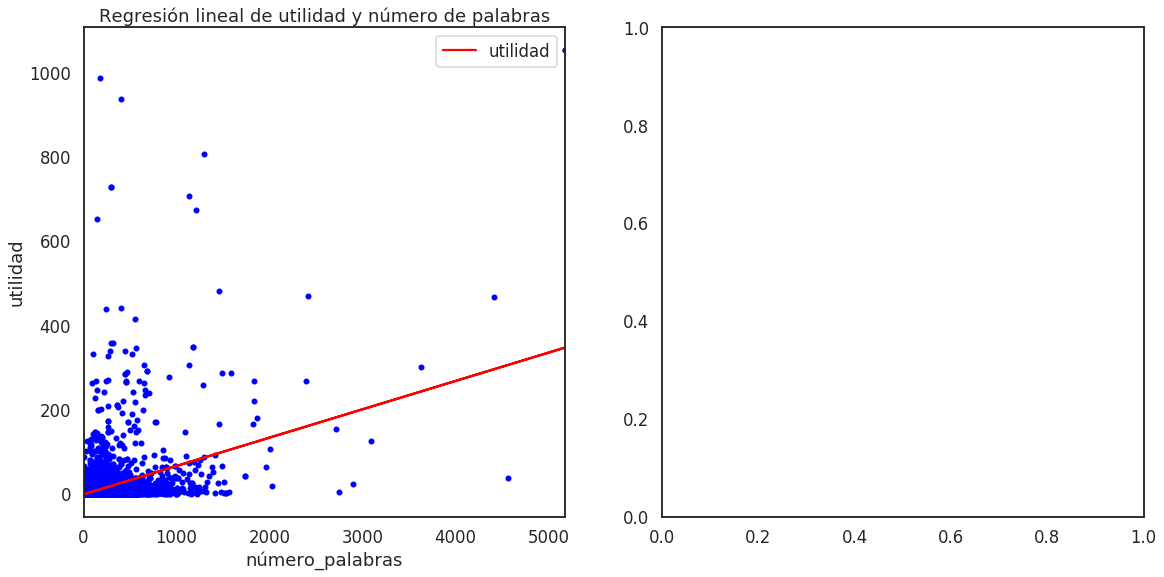

In [246]:
# ========================
fig, axes = plt.subplots(nrows=1, ncols=2)
 
# Plot the original data and model
data.plot(kind='scatter', color='Blue', x='número_palabras', y='utilidad', ax=axes[0], title='Regresión lineal de utilidad y número de palabras')
lm_original_plot.plot(kind='line', color='Red', x='número_palabras', y='utilidad', ax=axes[0])
 
# Plot the log transformed data and model
#data_log.plot(kind='scatter', color='Blue', x='len_review', y='utilidad', ax=axes[1], title='Log Values')
#lm_log_plot.plot(kind='line', color='Red', x='len_review', y='utilidad', ax=axes[1])
 
plt.show()